# Keras CNN Training (cat & dog classification)
based on https://www.youtube.com/watch?v=qFJeN9V1ZsI&t=1608s  (DeepLizard tutorial)

## Preparing data

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import os
import glob
import shutil
import itertools


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
# prepare train data
all_cats = glob.glob('data/cats_vs_dogs/all/cats/cat.2???.jpg')
print(f'cats len={len(all_cats)}')
all_cats.sort()
for file in all_cats :
    shutil.copy(file, 'data/cats_vs_dogs/train/cats/')

all_dogs = glob.glob('data/cats_vs_dogs/all/dogs/dog.2???.jpg')
print(f'dogs len={len(all_dogs)}')
all_dogs.sort()
for file in all_dogs :
    shutil.copy(file, 'data/cats_vs_dogs/train/dogs/')

dogs len=1000


In [17]:
# prepare validation data
all_cats = glob.glob('data/cats_vs_dogs/all/cats/cat.1???.jpg')[:500]
print(f'valid cats len={len(all_cats)}')
all_cats.sort()
for file in all_cats :
    shutil.copy(file, 'data/cats_vs_dogs/valid/cats/')

all_dogs = glob.glob('data/cats_vs_dogs/all/dogs/dog.1???.jpg')[:500]
print(f'valid dogs len={len(all_dogs)}')
all_dogs.sort()
for file in all_dogs :
    shutil.copy(file, 'data/cats_vs_dogs/valid/dogs/')

valid cats len=500
valid dogs len=500


In [3]:
train_path = 'data/cats_vs_dogs/train'
valid_path = 'data/cats_vs_dogs/valid'

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cats', 'dogs'], batch_size=20)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cats', 'dogs'], batch_size=20)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Build and Train CNN

In [5]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),    
    Flatten(),
    Dense(activation='softmax', units='2')
])

2022-03-22 20:13:13.421435: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-22 20:13:13.464855: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda/lib64
2022-03-22 20:13:13.464871: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-03-22 20:13:13.465556: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with o

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [7]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

Epoch 1/5
100/100 - 42s - loss: 18.4284 - accuracy: 0.5665 - val_loss: 3.3658 - val_accuracy: 0.5700 - 42s/epoch - 417ms/step
Epoch 2/5
100/100 - 44s - loss: 1.2436 - accuracy: 0.7460 - val_loss: 2.3320 - val_accuracy: 0.6200 - 44s/epoch - 441ms/step
Epoch 3/5
100/100 - 42s - loss: 0.4316 - accuracy: 0.8700 - val_loss: 1.5568 - val_accuracy: 0.6750 - 42s/epoch - 423ms/step
Epoch 4/5
100/100 - 45s - loss: 0.0870 - accuracy: 0.9690 - val_loss: 1.5809 - val_accuracy: 0.6580 - 45s/epoch - 455ms/step
Epoch 5/5
100/100 - 44s - loss: 0.0378 - accuracy: 0.9870 - val_loss: 1.5957 - val_accuracy: 0.6740 - 44s/epoch - 442ms/step


Train accuracy = 0.98, whereas validation accuracy = 0.67 - this means we have huge overfitting.

## Prediction and Confusion Matrix

Validation data set will be used as test set.

In [10]:
predictions = model.predict(x=valid_batches, verbose=2)

50/50 - 4s - 4s/epoch - 75ms/step


In [11]:
predictions[:10]

array([[9.9616110e-01, 3.8388404e-03],
       [9.9999750e-01, 2.5235654e-06],
       [1.5042346e-03, 9.9849582e-01],
       [2.8569287e-08, 1.0000000e+00],
       [1.3321526e-06, 9.9999869e-01],
       [9.5847613e-01, 4.1523829e-02],
       [8.6026013e-01, 1.3973993e-01],
       [9.9437863e-01, 5.6213741e-03],
       [6.5761262e-01, 3.4238738e-01],
       [5.7136308e-04, 9.9942857e-01]], dtype=float32)

In [22]:
rounded_predictions = np.round(predictions)
print(rounded_predictions.shape)
rounded_predictions[:10]

(1000, 2)


array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [26]:
predicted_labels = np.argmax(rounded_predictions, axis=1)
predicted_labels[:10]

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1])

In [27]:
valid_batches.classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

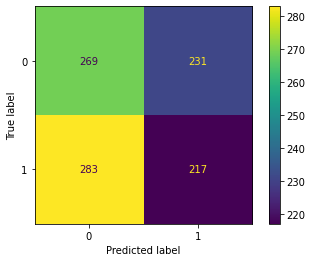

In [29]:
ConfusionMatrixDisplay.from_predictions(y_true=valid_batches.classes, y_pred=predicted_labels)